In [155]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

## Объединение полученных ранее датасетов

In [2]:
Features = pd.read_csv("anime.csv")

In [3]:
Targets = pd.read_csv("Score.csv")

In [4]:
Features = Features.drop("Unnamed: 0", axis = 1)
Targets = Targets.drop("Unnamed: 0", axis = 1)

In [5]:
Features.head()

,Type:,Episodes:,Status:,Aired:,Premiered:,Broadcast:,Producers:,Licensors:,Studios:,Source:,Genres:,Duration:,Rating:,Popularity:,Members:,Favorites:
0,0,64,Finished Airing,"Apr 5, 2009 to Jul 4, 2010",Spring 2009,Sundays at 17:00 (JST),"Aniplex, Square Enix, Mainichi Bro...","Funimation, Aniplex of America",Bones,Manga,"ActionAction, MilitaryMilitary, Advent...",24 min. per ep.,R - 17+ (violence & profanity),#3,"2,134,701","175,402"
1,0,16,Currently Airing,"Dec 7, 2020 to ?",Winter 2021,Mondays at 00:10 (JST),"Production I.G, Dentsu, Mainichi B...",Funimation,MAPPA,Manga,"ActionAction, MilitaryMilitary, Myster...",23 min. per ep.,R - 17+ (violence & profanity),#226,"493,739","19,153"
2,0,24,Finished Airing,"Apr 6, 2011 to Sep 14, 2011",Spring 2011,Wednesdays at 02:05 (JST),"Frontier Works, Media Factory, Mov...",Funimation,White Fox,Visual novel,"ThrillerThriller, Sci-FiSci-Fi",24 min. per ep.,PG-13 - Teens 13 or older,#9,"1,712,236","145,255"
3,0,51,Finished Airing,"Apr 8, 2015 to Mar 30, 2016",Spring 2015,Wednesdays at 18:00 (JST),"TV Tokyo, Aniplex, Dentsu","Funimation, Crunchyroll",Bandai Namco Pictures,Manga,"ActionAction, ComedyComedy, Historical...",24 min. per ep.,PG-13 - Teens 13 or older,#329,"387,115","11,426"
4,0,148,Finished Airing,"Oct 2, 2011 to Sep 24, 2014",Fall 2011,Sundays at 10:55 (JST),"VAP, Nippon Television Network, Sh...",VIZ Media,Madhouse,Manga,"ActionAction, AdventureAdventure, Fant...",23 min. per ep.,PG-13 - Teens 13 or older,#12,"1,576,539","140,372"


In [6]:
Targets.head()

,Score:
0,9.21
1,9.15
2,9.12
3,9.11
4,9.10


In [7]:
Anime = Features.join(Targets)

## Очистка и Категоризация с помощью LabelEncoder

In [8]:
Anime.head()

,Type:,Episodes:,Status:,Aired:,Premiered:,Broadcast:,Producers:,Licensors:,Studios:,Source:,Genres:,Duration:,Rating:,Popularity:,Members:,Favorites:,Score:
0,0,64,Finished Airing,"Apr 5, 2009 to Jul 4, 2010",Spring 2009,Sundays at 17:00 (JST),"Aniplex, Square Enix, Mainichi Bro...","Funimation, Aniplex of America",Bones,Manga,"ActionAction, MilitaryMilitary, Advent...",24 min. per ep.,R - 17+ (violence & profanity),#3,"2,134,701","175,402",9.21
1,0,16,Currently Airing,"Dec 7, 2020 to ?",Winter 2021,Mondays at 00:10 (JST),"Production I.G, Dentsu, Mainichi B...",Funimation,MAPPA,Manga,"ActionAction, MilitaryMilitary, Myster...",23 min. per ep.,R - 17+ (violence & profanity),#226,"493,739","19,153",9.15
2,0,24,Finished Airing,"Apr 6, 2011 to Sep 14, 2011",Spring 2011,Wednesdays at 02:05 (JST),"Frontier Works, Media Factory, Mov...",Funimation,White Fox,Visual novel,"ThrillerThriller, Sci-FiSci-Fi",24 min. per ep.,PG-13 - Teens 13 or older,#9,"1,712,236","145,255",9.12
3,0,51,Finished Airing,"Apr 8, 2015 to Mar 30, 2016",Spring 2015,Wednesdays at 18:00 (JST),"TV Tokyo, Aniplex, Dentsu","Funimation, Crunchyroll",Bandai Namco Pictures,Manga,"ActionAction, ComedyComedy, Historical...",24 min. per ep.,PG-13 - Teens 13 or older,#329,"387,115","11,426",9.11
4,0,148,Finished Airing,"Oct 2, 2011 to Sep 24, 2014",Fall 2011,Sundays at 10:55 (JST),"VAP, Nippon Television Network, Sh...",VIZ Media,Madhouse,Manga,"ActionAction, AdventureAdventure, Fant...",23 min. per ep.,PG-13 - Teens 13 or older,#12,"1,576,539","140,372",9.10


In [9]:
Anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5050 entries, 0 to 5049
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type:        5050 non-null   int64  
 1   Episodes:    5050 non-null   object 
 2   Status:      5050 non-null   object 
 3   Aired:       5050 non-null   object 
 4   Premiered:   2330 non-null   object 
 5   Broadcast:   2330 non-null   object 
 6   Producers:   5050 non-null   object 
 7   Licensors:   5050 non-null   object 
 8   Studios:     5050 non-null   object 
 9   Source:      5050 non-null   object 
 10  Genres:      5050 non-null   object 
 11  Duration:    5050 non-null   object 
 12  Rating:      5050 non-null   object 
 13  Popularity:  5050 non-null   object 
 14  Members:     5050 non-null   object 
 15  Favorites:   5050 non-null   object 
 16  Score:       5050 non-null   float64
dtypes: float64(1), int64(1), object(15)
memory usage: 374.9+ KB


In [10]:
Anime = Anime.dropna()

In [11]:
# for j in range(len(Anime["Episodes:"])):
#     try:
#         Anime["Episodes:"][j] = float(Anime["Episodes:"][j])
#     except:
#         Anime["Episodes:"][j] = np.mean([el for el in range(1,j)])
#         pass

In [12]:
Anime = Anime.replace("  Unknown", np.nan)

In [13]:
Anime = Anime.dropna()

In [14]:
Anime

,Type:,Episodes:,Status:,Aired:,Premiered:,Broadcast:,Producers:,Licensors:,Studios:,Source:,Genres:,Duration:,Rating:,Popularity:,Members:,Favorites:,Score:
0,0,64,Finished Airing,"Apr 5, 2009 to Jul 4, 2010",Spring 2009,Sundays at 17:00 (JST),"Aniplex, Square Enix, Mainichi Bro...","Funimation, Aniplex of America",Bones,Manga,"ActionAction, MilitaryMilitary, Advent...",24 min. per ep.,R - 17+ (violence & profanity),#3,"2,134,701","175,402",9.21
1,0,16,Currently Airing,"Dec 7, 2020 to ?",Winter 2021,Mondays at 00:10 (JST),"Production I.G, Dentsu, Mainichi B...",Funimation,MAPPA,Manga,"ActionAction, MilitaryMilitary, Myster...",23 min. per ep.,R - 17+ (violence & profanity),#226,"493,739","19,153",9.15
2,0,24,Finished Airing,"Apr 6, 2011 to Sep 14, 2011",Spring 2011,Wednesdays at 02:05 (JST),"Frontier Works, Media Factory, Mov...",Funimation,White Fox,Visual novel,"ThrillerThriller, Sci-FiSci-Fi",24 min. per ep.,PG-13 - Teens 13 or older,#9,"1,712,236","145,255",9.12
3,0,51,Finished Airing,"Apr 8, 2015 to Mar 30, 2016",Spring 2015,Wednesdays at 18:00 (JST),"TV Tokyo, Aniplex, Dentsu","Funimation, Crunchyroll",Bandai Namco Pictures,Manga,"ActionAction, ComedyComedy, Historical...",24 min. per ep.,PG-13 - Teens 13 or older,#329,"387,115","11,426",9.11
4,0,148,Finished Airing,"Oct 2, 2011 to Sep 24, 2014",Fall 2011,Sundays at 10:55 (JST),"VAP, Nippon Television Network, Sh...",VIZ Media,Madhouse,Manga,"ActionAction, AdventureAdventure, Fant...",23 min. per ep.,PG-13 - Teens 13 or older,#12,"1,576,539","140,372",9.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5037,0,12,Finished Airing,"Jul 10, 2017 to Sep 25, 2017",Summer 2017,Mondays at 20:00 (JST),"Sotsu, Lantis, AT-X, Barnum ...",Discotek Media,Project No.9,Light novel,"MusicMusic, SchoolSchool, Slice of Lif...",23 min. per ep.,PG-13 - Teens 13 or older,#2247,"48,965",77,6.67
5038,0,103,Finished Airing,"Oct 17, 1989 to Sep 29, 1992",Fall 1989,Tuesdays at Unknown,TBS,"None found, add some",Shin-Ei Animation,Manga,"ComedyComedy, PsychologicalPsychological, ...",10 min. per ep.,R+ - Mild Nudity,#6851,"4,239",28,6.67
5044,0,39,Finished Airing,"Apr 5, 2002 to Dec 27, 2002",Spring 2002,Fridays at 18:00 (JST),"TV Tokyo, Victor Entertainment","None found, add some",Nippon Animation,Original,"Sci-FiSci-Fi, AdventureAdventure, Mech...",21 min. per ep.,PG - Children,#8487,"2,227",12,6.67
5046,0,44,Finished Airing,"Apr 1, 1976 to Jan 27, 1977",Spring 1976,Unknown,Dynamic Planning,Discotek Media,Toei Animation,Original,"AdventureAdventure, MechaMecha, Sci-Fi...",24 min. per ep.,PG-13 - Teens 13 or older,#9000,"1,815",4,6.67


In [15]:
Anime["Episodes:"] = Anime["Episodes:"].astype("int64")

In [16]:
Anime.head()

,Type:,Episodes:,Status:,Aired:,Premiered:,Broadcast:,Producers:,Licensors:,Studios:,Source:,Genres:,Duration:,Rating:,Popularity:,Members:,Favorites:,Score:
0,0,64,Finished Airing,"Apr 5, 2009 to Jul 4, 2010",Spring 2009,Sundays at 17:00 (JST),"Aniplex, Square Enix, Mainichi Bro...","Funimation, Aniplex of America",Bones,Manga,"ActionAction, MilitaryMilitary, Advent...",24 min. per ep.,R - 17+ (violence & profanity),#3,"2,134,701","175,402",9.21
1,0,16,Currently Airing,"Dec 7, 2020 to ?",Winter 2021,Mondays at 00:10 (JST),"Production I.G, Dentsu, Mainichi B...",Funimation,MAPPA,Manga,"ActionAction, MilitaryMilitary, Myster...",23 min. per ep.,R - 17+ (violence & profanity),#226,"493,739","19,153",9.15
2,0,24,Finished Airing,"Apr 6, 2011 to Sep 14, 2011",Spring 2011,Wednesdays at 02:05 (JST),"Frontier Works, Media Factory, Mov...",Funimation,White Fox,Visual novel,"ThrillerThriller, Sci-FiSci-Fi",24 min. per ep.,PG-13 - Teens 13 or older,#9,"1,712,236","145,255",9.12
3,0,51,Finished Airing,"Apr 8, 2015 to Mar 30, 2016",Spring 2015,Wednesdays at 18:00 (JST),"TV Tokyo, Aniplex, Dentsu","Funimation, Crunchyroll",Bandai Namco Pictures,Manga,"ActionAction, ComedyComedy, Historical...",24 min. per ep.,PG-13 - Teens 13 or older,#329,"387,115","11,426",9.11
4,0,148,Finished Airing,"Oct 2, 2011 to Sep 24, 2014",Fall 2011,Sundays at 10:55 (JST),"VAP, Nippon Television Network, Sh...",VIZ Media,Madhouse,Manga,"ActionAction, AdventureAdventure, Fant...",23 min. per ep.,PG-13 - Teens 13 or older,#12,"1,576,539","140,372",9.10


In [17]:
year = []
for el in Anime["Aired:"]:
    try:
        num = float(el.split(" ")[4])
        year.append(num)
    except:
        pass

In [18]:
year_mean = int(np.mean(year))

In [19]:
year_mean

2007

In [20]:
year = []
for el in Anime["Aired:"]:
    try:
        num = float(el.split(" ")[4])
        year.append(num)
    except:
        year.append(year_mean)

In [21]:
Anime["Aired:"] = year
Anime["Aired:"] = Anime["Aired:"].astype("int64")

In [22]:
Anime.head()

,Type:,Episodes:,Status:,Aired:,Premiered:,Broadcast:,Producers:,Licensors:,Studios:,Source:,Genres:,Duration:,Rating:,Popularity:,Members:,Favorites:,Score:
0,0,64,Finished Airing,2009,Spring 2009,Sundays at 17:00 (JST),"Aniplex, Square Enix, Mainichi Bro...","Funimation, Aniplex of America",Bones,Manga,"ActionAction, MilitaryMilitary, Advent...",24 min. per ep.,R - 17+ (violence & profanity),#3,"2,134,701","175,402",9.21
1,0,16,Currently Airing,2020,Winter 2021,Mondays at 00:10 (JST),"Production I.G, Dentsu, Mainichi B...",Funimation,MAPPA,Manga,"ActionAction, MilitaryMilitary, Myster...",23 min. per ep.,R - 17+ (violence & profanity),#226,"493,739","19,153",9.15
2,0,24,Finished Airing,2011,Spring 2011,Wednesdays at 02:05 (JST),"Frontier Works, Media Factory, Mov...",Funimation,White Fox,Visual novel,"ThrillerThriller, Sci-FiSci-Fi",24 min. per ep.,PG-13 - Teens 13 or older,#9,"1,712,236","145,255",9.12
3,0,51,Finished Airing,2015,Spring 2015,Wednesdays at 18:00 (JST),"TV Tokyo, Aniplex, Dentsu","Funimation, Crunchyroll",Bandai Namco Pictures,Manga,"ActionAction, ComedyComedy, Historical...",24 min. per ep.,PG-13 - Teens 13 or older,#329,"387,115","11,426",9.11
4,0,148,Finished Airing,2011,Fall 2011,Sundays at 10:55 (JST),"VAP, Nippon Television Network, Sh...",VIZ Media,Madhouse,Manga,"ActionAction, AdventureAdventure, Fant...",23 min. per ep.,PG-13 - Teens 13 or older,#12,"1,576,539","140,372",9.10


In [23]:
## Категоризация признака Status:
cfg = dict(zip(Anime["Status:"].unique(), [0,1]))

In [24]:
Anime = Anime.replace(cfg)

In [25]:
Anime.head()

,Type:,Episodes:,Status:,Aired:,Premiered:,Broadcast:,Producers:,Licensors:,Studios:,Source:,Genres:,Duration:,Rating:,Popularity:,Members:,Favorites:,Score:
0,0,64,0,2009,Spring 2009,Sundays at 17:00 (JST),"Aniplex, Square Enix, Mainichi Bro...","Funimation, Aniplex of America",Bones,Manga,"ActionAction, MilitaryMilitary, Advent...",24 min. per ep.,R - 17+ (violence & profanity),#3,"2,134,701","175,402",9.21
1,0,16,1,2020,Winter 2021,Mondays at 00:10 (JST),"Production I.G, Dentsu, Mainichi B...",Funimation,MAPPA,Manga,"ActionAction, MilitaryMilitary, Myster...",23 min. per ep.,R - 17+ (violence & profanity),#226,"493,739","19,153",9.15
2,0,24,0,2011,Spring 2011,Wednesdays at 02:05 (JST),"Frontier Works, Media Factory, Mov...",Funimation,White Fox,Visual novel,"ThrillerThriller, Sci-FiSci-Fi",24 min. per ep.,PG-13 - Teens 13 or older,#9,"1,712,236","145,255",9.12
3,0,51,0,2015,Spring 2015,Wednesdays at 18:00 (JST),"TV Tokyo, Aniplex, Dentsu","Funimation, Crunchyroll",Bandai Namco Pictures,Manga,"ActionAction, ComedyComedy, Historical...",24 min. per ep.,PG-13 - Teens 13 or older,#329,"387,115","11,426",9.11
4,0,148,0,2011,Fall 2011,Sundays at 10:55 (JST),"VAP, Nippon Television Network, Sh...",VIZ Media,Madhouse,Manga,"ActionAction, AdventureAdventure, Fant...",23 min. per ep.,PG-13 - Teens 13 or older,#12,"1,576,539","140,372",9.10


In [26]:
Anime["Premiered:"] = [el.split(" ")[0] for el in Anime["Premiered:"]]

In [27]:
cfg = dict(zip(Anime["Premiered:"].unique(), [x for x in range(4)]))

In [28]:
Anime = Anime.replace(cfg)

In [29]:
Anime.head()

,Type:,Episodes:,Status:,Aired:,Premiered:,Broadcast:,Producers:,Licensors:,Studios:,Source:,Genres:,Duration:,Rating:,Popularity:,Members:,Favorites:,Score:
0,0,64,0,2009,0,Sundays at 17:00 (JST),"Aniplex, Square Enix, Mainichi Bro...","Funimation, Aniplex of America",Bones,Manga,"ActionAction, MilitaryMilitary, Advent...",24 min. per ep.,R - 17+ (violence & profanity),#3,"2,134,701","175,402",9.21
1,0,16,1,2020,1,Mondays at 00:10 (JST),"Production I.G, Dentsu, Mainichi B...",Funimation,MAPPA,Manga,"ActionAction, MilitaryMilitary, Myster...",23 min. per ep.,R - 17+ (violence & profanity),#226,"493,739","19,153",9.15
2,0,24,0,2011,0,Wednesdays at 02:05 (JST),"Frontier Works, Media Factory, Mov...",Funimation,White Fox,Visual novel,"ThrillerThriller, Sci-FiSci-Fi",24 min. per ep.,PG-13 - Teens 13 or older,#9,"1,712,236","145,255",9.12
3,0,51,0,2015,0,Wednesdays at 18:00 (JST),"TV Tokyo, Aniplex, Dentsu","Funimation, Crunchyroll",Bandai Namco Pictures,Manga,"ActionAction, ComedyComedy, Historical...",24 min. per ep.,PG-13 - Teens 13 or older,#329,"387,115","11,426",9.11
4,0,148,0,2011,2,Sundays at 10:55 (JST),"VAP, Nippon Television Network, Sh...",VIZ Media,Madhouse,Manga,"ActionAction, AdventureAdventure, Fant...",23 min. per ep.,PG-13 - Teens 13 or older,#12,"1,576,539","140,372",9.10


In [30]:
Anime["Broadcast:"] = [el.split(" ")[4] for el in Anime["Broadcast:"]]

In [31]:
Anime["Broadcast:"].unique()

array(['Sundays', 'Mondays', 'Wednesdays', 'Thursdays', 'Saturdays',
       'Fridays', 'Not', 'Tuesdays', 'Unknown'], dtype=object)

In [32]:
cfg1 = {"Not": np.NaN, "Unknown": np.NaN}
Anime = Anime.replace(cfg1)

In [33]:
Br_mode = Anime["Broadcast:"].mode()

In [34]:
cfg = dict(zip(Anime["Broadcast:"].unique(), [x for x in range(8)] ))

In [35]:
Anime = Anime.replace(cfg)
cfg

{'Sundays': 0,
 'Mondays': 1,
 'Wednesdays': 2,
 'Thursdays': 3,
 'Saturdays': 4,
 'Fridays': 5,
 nan: 6,
 'Tuesdays': 7}

In [36]:
Anime["Broadcast:"] = [el if el != 6 else cfg[Br_mode.tolist()[0]] for el in Anime["Broadcast:"]]

In [37]:
Anime

,Type:,Episodes:,Status:,Aired:,Premiered:,Broadcast:,Producers:,Licensors:,Studios:,Source:,Genres:,Duration:,Rating:,Popularity:,Members:,Favorites:,Score:
0,0,64,0,2009,0,0,"Aniplex, Square Enix, Mainichi Bro...","Funimation, Aniplex of America",Bones,Manga,"ActionAction, MilitaryMilitary, Advent...",24 min. per ep.,R - 17+ (violence & profanity),#3,"2,134,701","175,402",9.21
1,0,16,1,2020,1,1,"Production I.G, Dentsu, Mainichi B...",Funimation,MAPPA,Manga,"ActionAction, MilitaryMilitary, Myster...",23 min. per ep.,R - 17+ (violence & profanity),#226,"493,739","19,153",9.15
2,0,24,0,2011,0,2,"Frontier Works, Media Factory, Mov...",Funimation,White Fox,Visual novel,"ThrillerThriller, Sci-FiSci-Fi",24 min. per ep.,PG-13 - Teens 13 or older,#9,"1,712,236","145,255",9.12
3,0,51,0,2015,0,2,"TV Tokyo, Aniplex, Dentsu","Funimation, Crunchyroll",Bandai Namco Pictures,Manga,"ActionAction, ComedyComedy, Historical...",24 min. per ep.,PG-13 - Teens 13 or older,#329,"387,115","11,426",9.11
4,0,148,0,2011,2,0,"VAP, Nippon Television Network, Sh...",VIZ Media,Madhouse,Manga,"ActionAction, AdventureAdventure, Fant...",23 min. per ep.,PG-13 - Teens 13 or older,#12,"1,576,539","140,372",9.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5037,0,12,0,2017,3,1,"Sotsu, Lantis, AT-X, Barnum ...",Discotek Media,Project No.9,Light novel,"MusicMusic, SchoolSchool, Slice of Lif...",23 min. per ep.,PG-13 - Teens 13 or older,#2247,"48,965",77,6.67
5038,0,103,0,1989,2,7,TBS,"None found, add some",Shin-Ei Animation,Manga,"ComedyComedy, PsychologicalPsychological, ...",10 min. per ep.,R+ - Mild Nudity,#6851,"4,239",28,6.67
5044,0,39,0,2002,0,5,"TV Tokyo, Victor Entertainment","None found, add some",Nippon Animation,Original,"Sci-FiSci-Fi, AdventureAdventure, Mech...",21 min. per ep.,PG - Children,#8487,"2,227",12,6.67
5046,0,44,0,1976,0,0,Dynamic Planning,Discotek Media,Toei Animation,Original,"AdventureAdventure, MechaMecha, Sci-Fi...",24 min. per ep.,PG-13 - Teens 13 or older,#9000,"1,815",4,6.67


In [38]:
Anime = Anime.drop(["Producers:", "Licensors:"], axis = 1)

In [39]:
len(Anime["Source:"].unique())

14

In [40]:
Anime = Anime.drop("Popularity:", axis = 1)

In [41]:
Anime["Duration:"] = [int(el.split(" ")[2]) for el in Anime["Duration:"]]

In [42]:
cfg = dict(zip(Anime["Rating:"].unique(), [x for x in range(len(Anime["Rating:"].unique()))]))

In [43]:
Anime = Anime.replace(cfg)

In [44]:
Anime.head()

,Type:,Episodes:,Status:,Aired:,Premiered:,Broadcast:,Studios:,Source:,Genres:,Duration:,Rating:,Members:,Favorites:,Score:
0,0,64,0,2009,0,0,Bones,Manga,"ActionAction, MilitaryMilitary, Advent...",24,0,"2,134,701","175,402",9.21
1,0,16,1,2020,1,1,MAPPA,Manga,"ActionAction, MilitaryMilitary, Myster...",23,0,"493,739","19,153",9.15
2,0,24,0,2011,0,2,White Fox,Visual novel,"ThrillerThriller, Sci-FiSci-Fi",24,1,"1,712,236","145,255",9.12
3,0,51,0,2015,0,2,Bandai Namco Pictures,Manga,"ActionAction, ComedyComedy, Historical...",24,1,"387,115","11,426",9.11
4,0,148,0,2011,2,0,Madhouse,Manga,"ActionAction, AdventureAdventure, Fant...",23,1,"1,576,539","140,372",9.10


In [45]:
Anime["Favorites:"] = [int(el.split(",")[0] + el.split(",")[1]) if "," in el else float(el) for el in Anime["Favorites:"]]

In [46]:
members = []
for el in Anime["Members:"]:
    members.append(int(el.replace(",","")))

In [47]:
Anime["Members:"] = members

In [48]:
Anime.head()

,Type:,Episodes:,Status:,Aired:,Premiered:,Broadcast:,Studios:,Source:,Genres:,Duration:,Rating:,Members:,Favorites:,Score:
0,0,64,0,2009,0,0,Bones,Manga,"ActionAction, MilitaryMilitary, Advent...",24,0,2134701,175402.0,9.21
1,0,16,1,2020,1,1,MAPPA,Manga,"ActionAction, MilitaryMilitary, Myster...",23,0,493739,19153.0,9.15
2,0,24,0,2011,0,2,White Fox,Visual novel,"ThrillerThriller, Sci-FiSci-Fi",24,1,1712236,145255.0,9.12
3,0,51,0,2015,0,2,Bandai Namco Pictures,Manga,"ActionAction, ComedyComedy, Historical...",24,1,387115,11426.0,9.11
4,0,148,0,2011,2,0,Madhouse,Manga,"ActionAction, AdventureAdventure, Fant...",23,1,1576539,140372.0,9.10


In [67]:
Genres = [(el.split(el[1])[0] + el[1] + el.split(el[1])[1])[:-1] for el in Anime["Genres:"]]

In [68]:
Anime["Genres:"] = Genres

In [70]:
Anime["Genres:"].unique()

array(['Action', 'Thriller', 'Drama', 'Slice of Life', 'Myste', 'Comedy',
       'Adventure', 'Sci-Fi', 'Psychological', 'Game', 'Music', 'Josei',
       'Romance', 'Sports', 'Mi', 'E', 'Space', 'Harem', 'Fan', 'De',
       'Histo', 'Kids', 'Hor', 'Cars', 'School', 'Demons', 'Sei', 'Mart',
       'Shounen', 'Mecha', 'Magic', 'Superna', 'Super Power', 'Parody'],
      dtype=object)

In [72]:
cfg = dict(zip(Anime["Studios:"].unique(), [x for x in range(len(Anime["Studios:"].unique()))]))

In [73]:
Anime = Anime.replace(cfg)

In [74]:
Anime.head()

,Type:,Episodes:,Status:,Aired:,Premiered:,Broadcast:,Studios:,Source:,Genres:,Duration:,Rating:,Members:,Favorites:,Score:
0,0,64,0,2009,0,0,0,Manga,Action,24,0,2134701,175402.0,9.21
1,0,16,1,2020,1,1,1,Manga,Action,23,0,493739,19153.0,9.15
2,0,24,0,2011,0,2,2,Visual novel,Thriller,24,1,1712236,145255.0,9.12
3,0,51,0,2015,0,2,3,Manga,Action,24,1,387115,11426.0,9.11
4,0,148,0,2011,2,0,4,Manga,Action,23,1,1576539,140372.0,9.10


## OneHotEncoder

In [75]:
for name in pd.unique(Anime["Source:"].tolist()):
    Anime[name] = [1 if name == Anime["Source:"][i] else 0 for i in Anime.index]

In [76]:
for name in pd.unique(Anime["Source:"].tolist()):
    Anime[name] = [1 if name == Anime["Source:"][i] else 0 for i in Anime.index]

In [77]:
Anime.head()

,Type:,Episodes:,Status:,Aired:,Premiered:,Broadcast:,Studios:,Source:,Genres:,Duration:,...,Web manga,Novel,4-koma manga,Game,Book,Other,Card game,5,Picture book,Digital manga
0,0,64,0,2009,0,0,0,Manga,Action,24,...,0,0,0,0,0,0,0,0,0,0
1,0,16,1,2020,1,1,1,Manga,Action,23,...,0,0,0,0,0,0,0,0,0,0
2,0,24,0,2011,0,2,2,Visual novel,Thriller,24,...,0,0,0,0,0,0,0,0,0,0
3,0,51,0,2015,0,2,3,Manga,Action,24,...,0,0,0,0,0,0,0,0,0,0
4,0,148,0,2011,2,0,4,Manga,Action,23,...,0,0,0,0,0,0,0,0,0,0


In [78]:
Anime.to_csv("clean_anime_dataset.csv")

In [94]:
Anime = Anime.drop(["Premiered:", "Source:", "Genres:"], axis = 1)

## Машинное обучение 

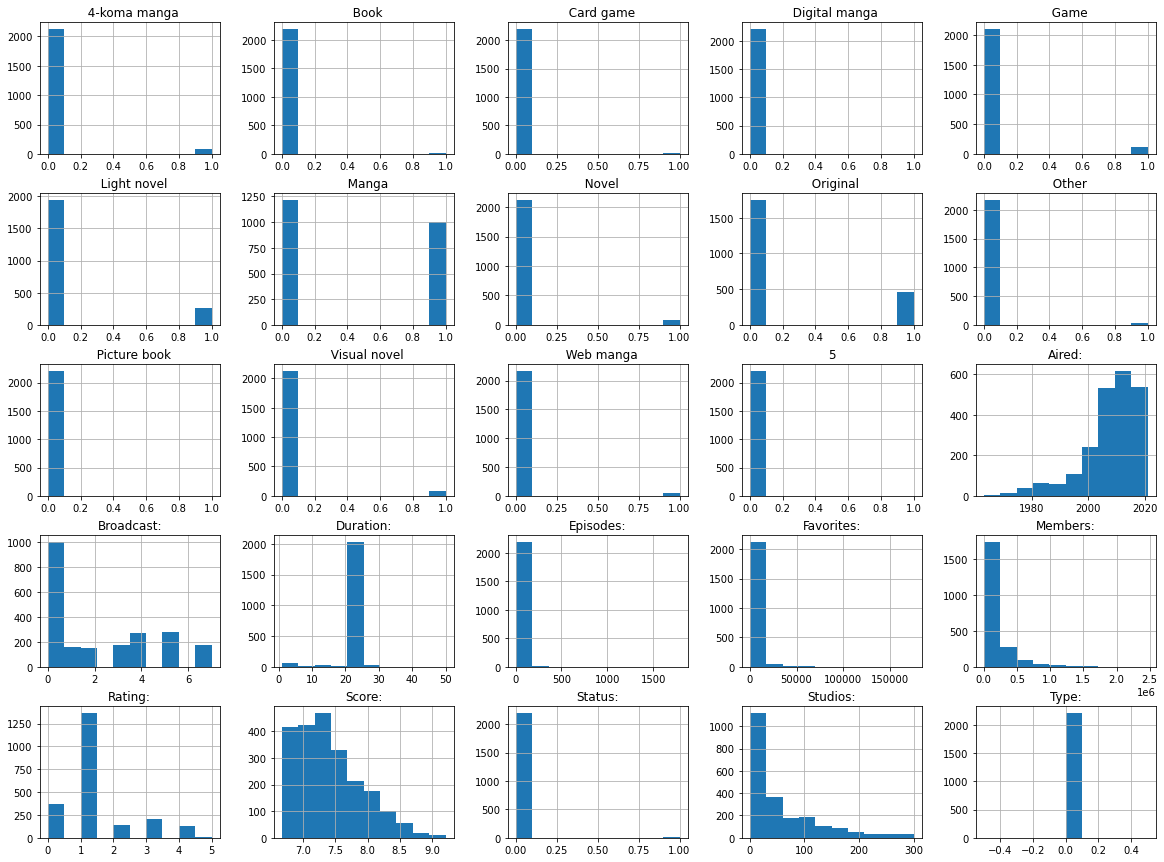

In [152]:
## Первоначальное распределение данных 
Anime.hist()
fig = plt.gcf()
fig.set_size_inches(20,15)

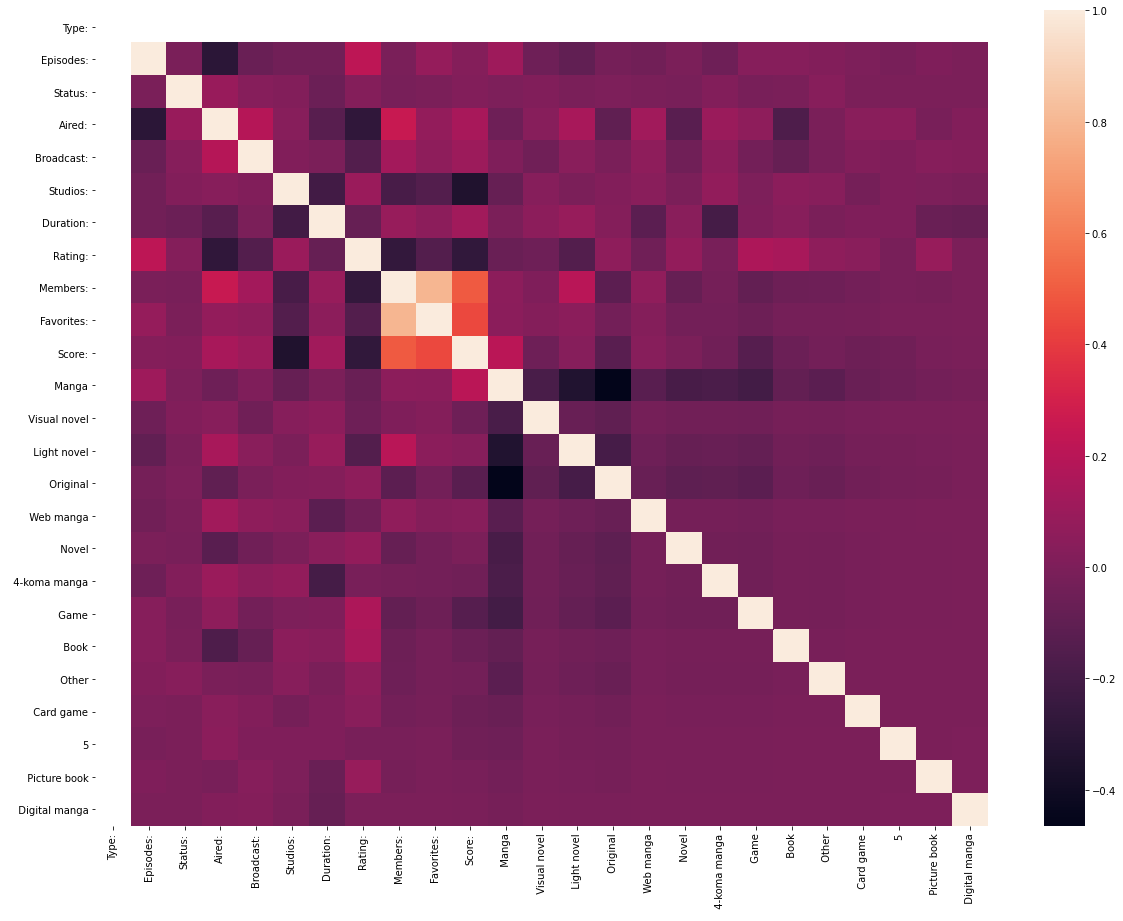

In [157]:
## Тепловая корреляционная матрица: 
plt.figure(figsize = (20,15))
sns.heatmap(Anime.corr())

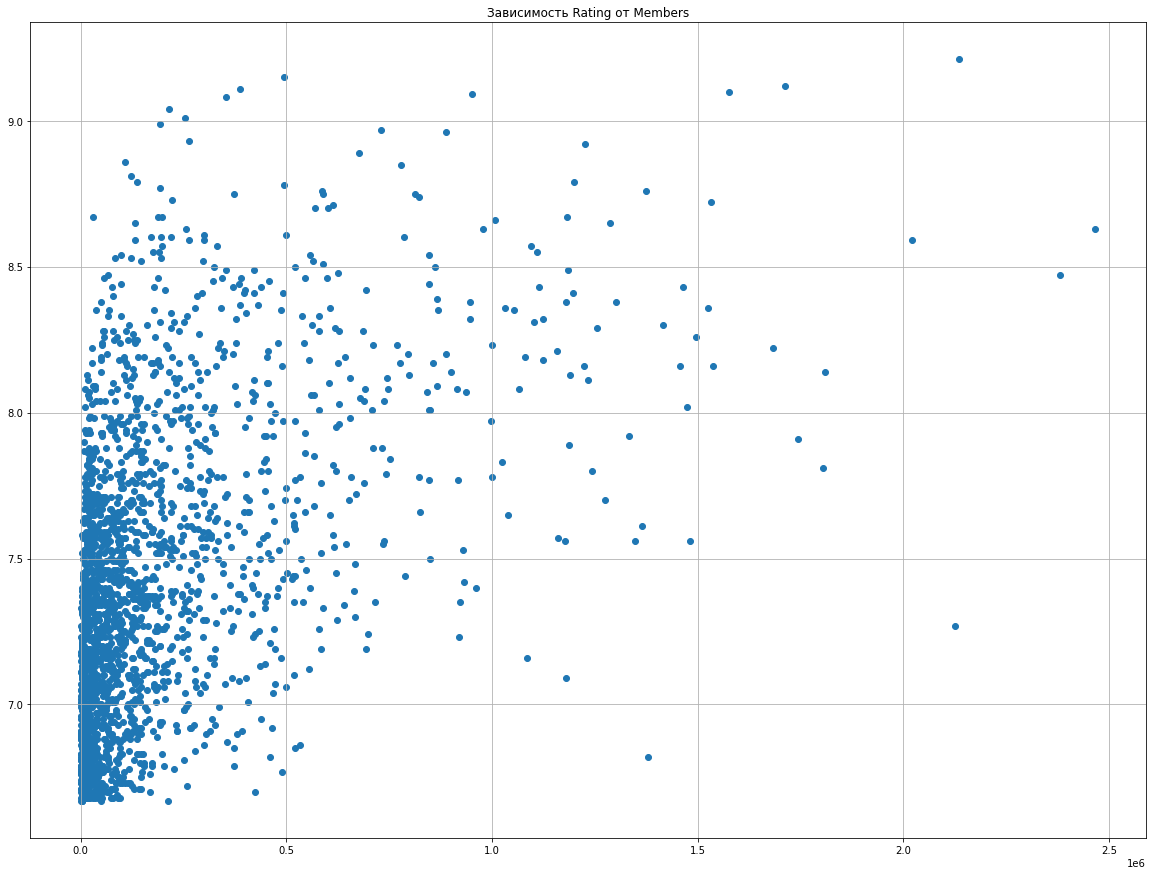

In [160]:
plt.figure(figsize = (20,15))
plt.grid()
plt.title("Зависимость Rating от Members")
plt.scatter(Anime["Members:"], Anime["Score:"])

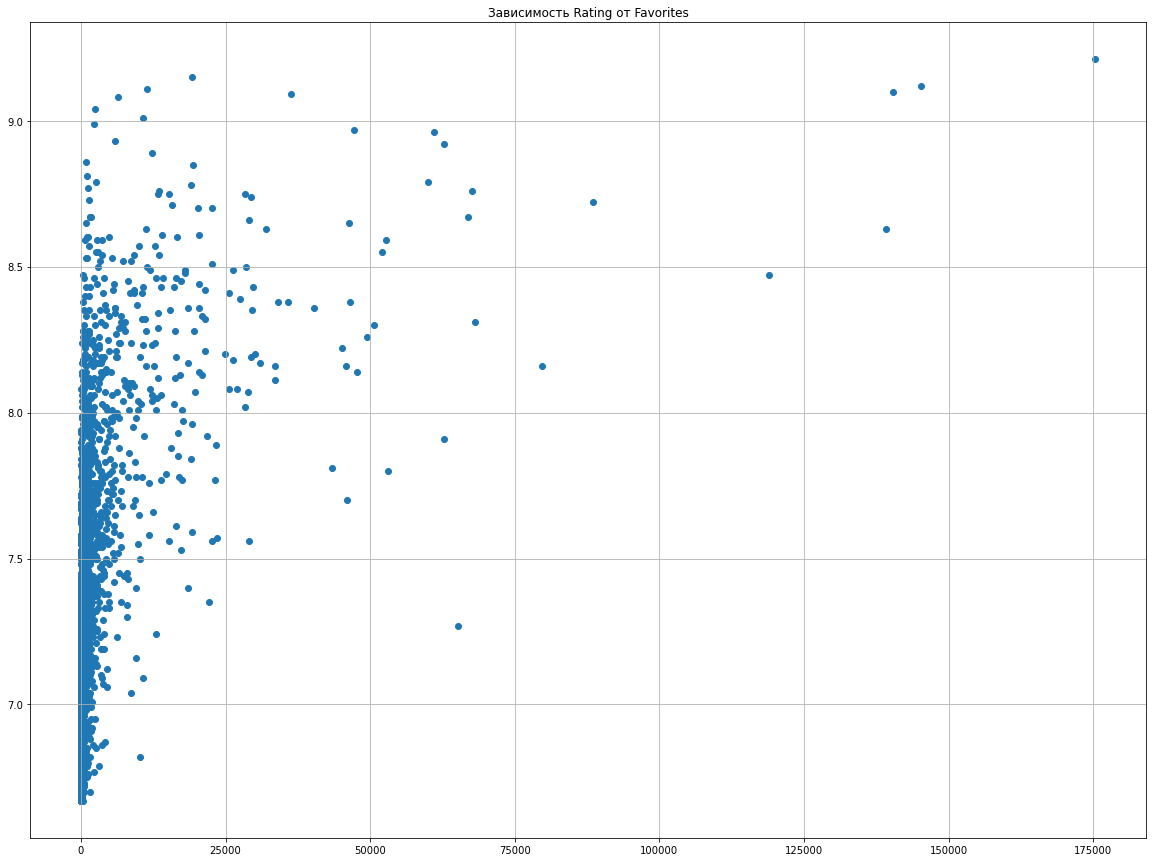

In [161]:
plt.figure(figsize = (20,15))
plt.grid()
plt.title("Зависимость Rating от Favorites")
plt.scatter(Anime["Favorites:"], Anime["Score:"])

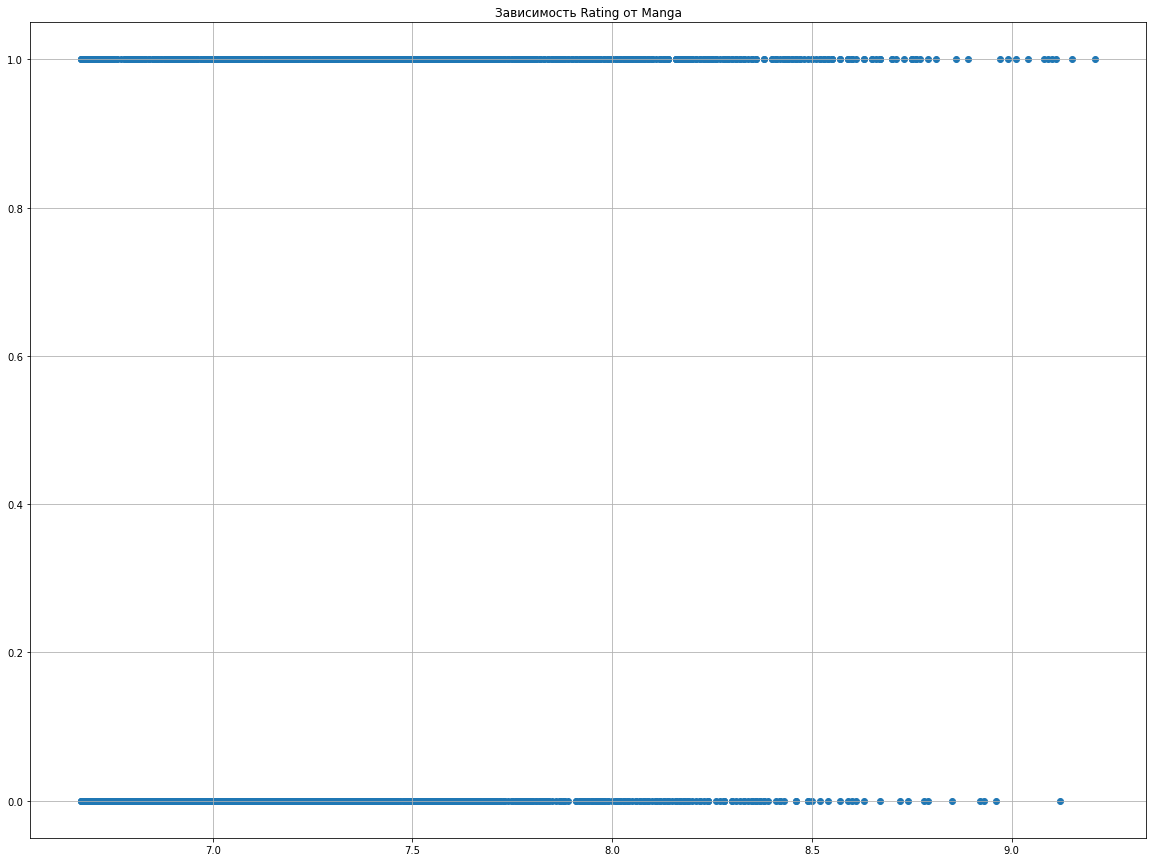

In [165]:
plt.figure(figsize = (20,15))
plt.grid()
plt.title("Зависимость Rating от Manga")
plt.scatter(Anime["Score:"], Anime["  Manga"])

In [167]:
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import Ridge 
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error as msle 
from sklearn.neural_network import MLPRegressor

## Задача Регрессии 

In [124]:
X = Anime.drop("Score:", axis = 1)
y = Anime["Score:"]

In [172]:
## Шкалирование данных 
X = StandardScaler().fit_transform(X)
## Разделение выборки на тестовую и тренирвочную:

In [173]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state = 42,
    test_size = 0.3
)

In [174]:
models = [
    Ridge(),
    RandomForestRegressor(),
    KNeighborsRegressor(),
    DecisionTreeRegressor()
]

frame = pd.DataFrame({
    "model:" : [],
    "rmse:" : [],
    "msle:": [],
    "R^2": []
})

i = 0 
for model in models:
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(ypred,y_test))
    msle_ = msle(ypred, y_test)
    frame.loc[i] = [str(model), rmse, msle_, model.score(X_test, y_test)]
    i += 1
    

In [175]:
frame

,model:,rmse:,msle:,R^2
0,Ridge(),0.406461,0.002268,0.330628
1,RandomForestRegressor(),0.310571,0.001341,0.609203
2,KNeighborsRegressor(),0.421373,0.002478,0.280613
3,DecisionTreeRegressor(),0.443136,0.002719,0.204385


In [176]:
## Лучшая модель RandomForest:

In [177]:
RF = RandomForestRegressor(
    n_estimators = 1000,
    max_features = 22,
    max_depth = 12
)

RF.fit(X_train, y_train)

RandomForestRegressor(max_depth=12, max_features=22, n_estimators=1000)

In [178]:
RF.score(X_test, y_test)

0.6113431499225255

In [179]:
from sklearn.ensemble import GradientBoostingRegressor

In [180]:
GB = GradientBoostingRegressor(
    n_estimators = 100
)
GB.fit(X_train, y_train)

GradientBoostingRegressor()

In [181]:
GB.score(X_test, y_test)

0.6039218571151286

In [182]:
predicted = RF.predict(X_test)

Text(0, 0.5, 'Rating')

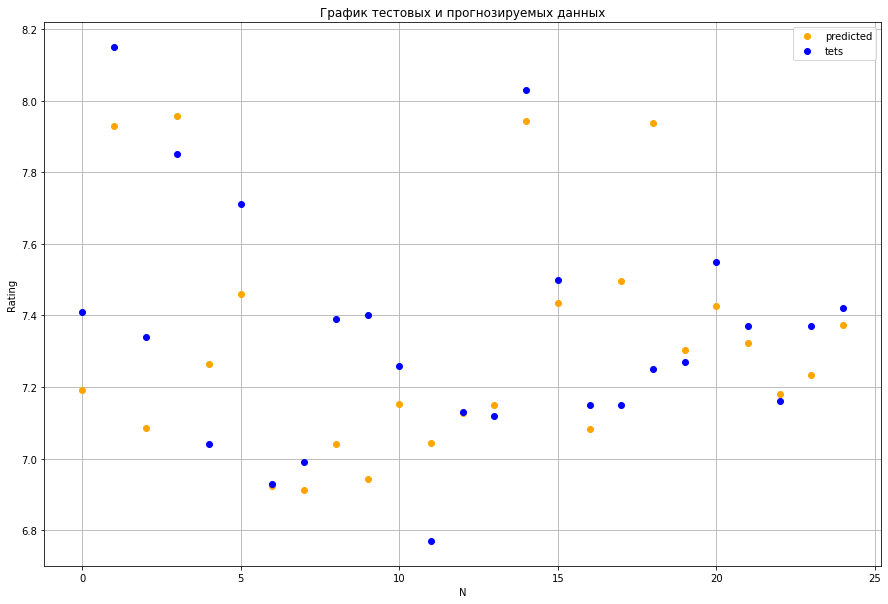

In [183]:
plt.figure(figsize = (15,10))

n = 25
xvalues = [x for x in range(len(predicted[:n]))]
plt.plot(xvalues, predicted[:n], "ro", label = "predicted", c = "orange")
plt.plot(xvalues, y_test[:n], "ro", label = "tets", c = "b")
plt.legend()
plt.grid()
plt.title("График тестовых и прогнозируемых данных")
plt.xlabel("N")
plt.ylabel("Rating")

In [201]:
sample = []
for name in Anime:
    if name != "Score:":
        sample.append(float(input("Введите " + name + " :")))

Введите Type: :0
Введите Episodes: :24
Введите Status: :0
Введите Aired: :2020
Введите Broadcast: :3
Введите Studios: :12
Введите Duration: :25
Введите Rating: :3
Введите Members: :150000
Введите Favorites: :15000
Введите   Manga :1
Введите   Visual novel :0
Введите   Light novel :0
Введите   Original :0
Введите   Web manga :0
Введите   Novel :0
Введите   4-koma manga :0
Введите   Game :0
Введите   Book :0
Введите   Other :0
Введите   Card game :0
Введите 5 :0
Введите   Picture book :0
Введите   Digital manga :0


In [205]:
X_INPUT = StandardScaler().fit(X).transform(np.array(sample).reshape(1,-1))

In [207]:
print("По введенным данным Score: " + str(RF.predict(X_INPUT)[0]))

По введенным данным Score: 7.9148000000000245


## Задача Кластеризации 

In [185]:
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.manifold import TSNE

In [186]:
X = Anime.drop("Score:", axis = 1)

In [187]:
X = StandardScaler().fit_transform(X)

In [188]:
X

array([[ 0.        ,  0.69004499, -0.07681825, ..., -0.05210501,
        -0.03681882, -0.02124776],
       [ 0.        , -0.24112706, 13.01773938, ..., -0.05210501,
        -0.03681882, -0.02124776],
       [ 0.        , -0.08593172, -0.07681825, ..., -0.05210501,
        -0.03681882, -0.02124776],
       ...,
       [ 0.        ,  0.20505955, -0.07681825, ..., -0.05210501,
        -0.03681882, -0.02124776],
       [ 0.        ,  0.30205664, -0.07681825, ..., -0.05210501,
        -0.03681882, -0.02124776],
       [ 0.        ,  0.04986421, -0.07681825, ..., -0.05210501,
        -0.03681882, -0.02124776]])

In [189]:
## Понижение размерности до 2 для визуализации: 
X_embedded = TSNE(n_components=2, random_state = 22).fit_transform(X)

## Разделение данных на тренировочные и тестовые 
X_train, X_test = train_test_split(X_embedded, random_state = 42, test_size = 0.2)

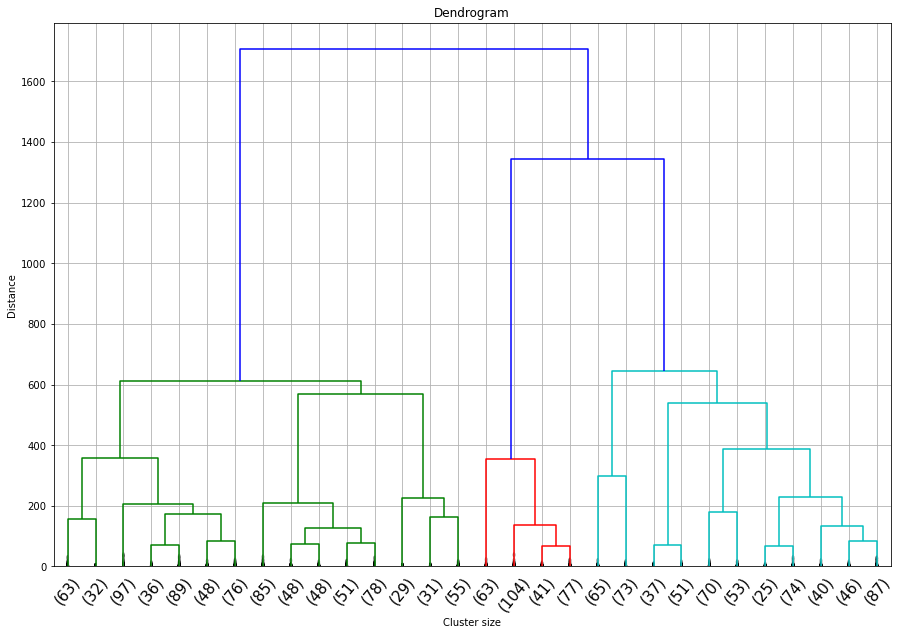

In [190]:
## Построение дендрограммы для определения количества кластеров:
Z  = linkage(X_train,'ward')
dendrogram(Z, truncate_mode = 'lastp', leaf_rotation = 50. , leaf_font_size = 15., show_contracted = True)

plt.title('Dendrogram')
plt.xlabel('Cluster size')
plt.ylabel('Distance')
plt.grid()
fig = plt.gcf()
fig.set_size_inches(15,10)

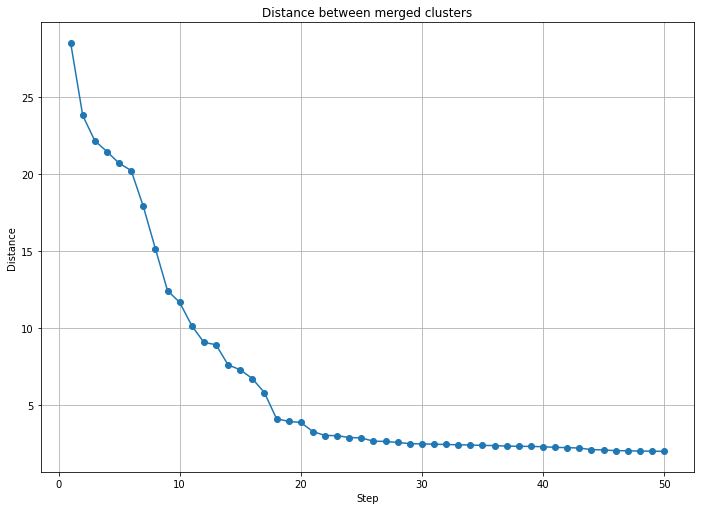

In [191]:
## Построение графика (метод локтей) для определения количества кластеров:
link = linkage(X_embedded)
dist = link[-50:, 2]
dist_rev = dist[::-1]
idxs = range(1, len(dist) + 1)

fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
plt.plot(idxs, dist_rev, marker='o')
plt.title('Distance between merged clusters')
plt.xlabel('Step')
plt.ylabel('Distance')
plt.grid()

In [198]:
KM = KMeans(n_clusters = 2).fit(X_train)
pred = KM.predict(X_test)

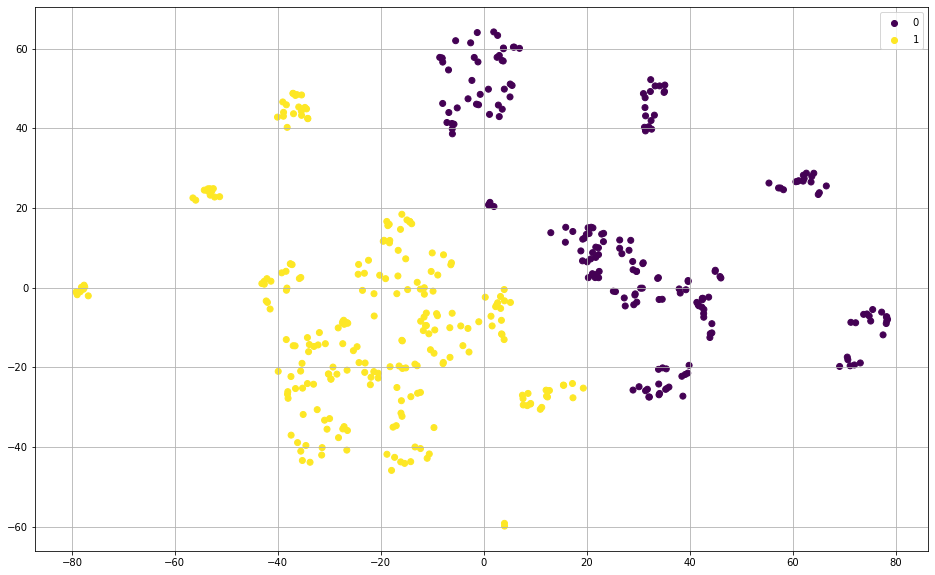

In [199]:
fig = plt.gcf()
fig.set_size_inches(16,10)
p = plt.scatter( x = [x[0] for x in X_test],y =[x[1] for x in X_test],  c = pred, label = pred)
a = p.legend_elements(prop = 'colors')
plt.grid()
plt.legend(*a)